In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## **Project: Annual Water Usage in Baltimore**

The steps of this project that we will work through are as follows:
1. Problem Description.
2. Test Harness.
3. Persistence.
4. Data Analysis.
5. ARIMA Models
6. Model Validation.

This will provide a template for working through a time series prediction problem that you can use on your own dataset.

**Problem Description**

The problem is to predict annual water usage. The dataset provides the annual water usage in Baltimore from 1885 to 1963, or 79 years of data. The values are in the units of liters per capita per day, and there are 79 observations.

**Test Harness**

In [2]:
series = pd.read_csv('yearly-water-usage.csv',header=0,index_col=0,parse_dates=True,squeeze=True)
split_point =len(series) -10
dataset, validation = series[0:split_point], series[split_point:]
print(f"Dataset: {len(dataset)}\nValidation: {len(validation)}")
dataset.to_csv("dataset.csv", header=False)
validation.to_csv("validation.csv", header=False)

Dataset: 69
Validation: 10


In [3]:
dataset # dataset.csv: Observations from 1885 to 1953 (69 observations).

Year
1885-01-01    356
1886-01-01    386
1887-01-01    397
1888-01-01    397
1889-01-01    413
             ... 
1949-01-01    598
1950-01-01    575
1951-01-01    564
1952-01-01    549
1953-01-01    538
Name: Water, Length: 69, dtype: int64

In [4]:
dataset.values

array([356, 386, 397, 397, 413, 458, 485, 344, 390, 360, 420, 435, 439,
       454, 462, 454, 469, 500, 492, 473, 458, 469, 481, 488, 466, 462,
       473, 530, 662, 651, 587, 515, 526, 503, 503, 503, 515, 522, 492,
       503, 503, 450, 432, 432, 458, 462, 503, 488, 466, 492, 503, 515,
       500, 522, 575, 583, 587, 628, 640, 609, 606, 632, 617, 613, 598,
       575, 564, 549, 538], dtype=int64)

In [5]:
validation # validation.csv: Observations from 1954 to 1963 (10 observations).

Year
1954-01-01    568
1955-01-01    575
1956-01-01    579
1957-01-01    587
1958-01-01    602
1959-01-01    594
1960-01-01    587
1961-01-01    587
1962-01-01    625
1963-01-01    613
Name: Water, dtype: int64

*Model Evaluation*

Refer to chap30

**Persistence**

In [6]:
# evaluate a persistence model
from sklearn.metrics import mean_squared_error

# load data
series = pd.read_csv('dataset.csv',header=None,index_col=0,parse_dates=True,squeeze=True)

# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

# walk-forward validation
history = [x for x in train]
predictions = []
for i in range(len(test)):
    # predict
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print(f"Predicted: {yhat}, Expected: {obs}")
# report performance
rmse = mean_squared_error(test,predictions, squared=False)
print(f"RMSE: {rmse}")

Predicted: 503.0, Expected: 503.0
Predicted: 503.0, Expected: 503.0
Predicted: 503.0, Expected: 515.0
Predicted: 515.0, Expected: 522.0
Predicted: 522.0, Expected: 492.0
Predicted: 492.0, Expected: 503.0
Predicted: 503.0, Expected: 503.0
Predicted: 503.0, Expected: 450.0
Predicted: 450.0, Expected: 432.0
Predicted: 432.0, Expected: 432.0
Predicted: 432.0, Expected: 458.0
Predicted: 458.0, Expected: 462.0
Predicted: 462.0, Expected: 503.0
Predicted: 503.0, Expected: 488.0
Predicted: 488.0, Expected: 466.0
Predicted: 466.0, Expected: 492.0
Predicted: 492.0, Expected: 503.0
Predicted: 503.0, Expected: 515.0
Predicted: 515.0, Expected: 500.0
Predicted: 500.0, Expected: 522.0
Predicted: 522.0, Expected: 575.0
Predicted: 575.0, Expected: 583.0
Predicted: 583.0, Expected: 587.0
Predicted: 587.0, Expected: 628.0
Predicted: 628.0, Expected: 640.0
Predicted: 640.0, Expected: 609.0
Predicted: 609.0, Expected: 606.0
Predicted: 606.0, Expected: 632.0
Predicted: 632.0, Expected: 617.0
Predicted: 617

**Data Analysis**

In this section, we will look at the data from four perspectives:
1. Summary Statistics.
2. Line Plot.
3. Density Plots.
4. Box and Whisker Plot.

*Summary Statistics*

In [7]:
# load data
series = pd.read_csv('dataset.csv',header=None,index_col=0,parse_dates=True,squeeze=True)
# summary statistics
series.describe()

count     69.000000
mean     500.478261
std       73.901685
min      344.000000
25%      458.000000
50%      492.000000
75%      538.000000
max      662.000000
Name: 1, dtype: float64

In [23]:
# statistical test for te stationarity of the time series
from statsmodels.tsa.stattools import adfuller

X = series.values
result = adfuller(X)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print(f"Crtitical Values: ")
for key,value in result[4].items():
    print(f"{key}: {np.round(value,4)}")

# Fail to reject null hypothesis --> non-stationary

ADF Statistic: -2.2673026501091376
p-value: 0.18273041245616378
Crtitical Values: 
1%: -3.5336
5%: -2.9064
10%: -2.5907


Some observations from these statistics include:
- The number of observations (count) matches our expectation, meaning we are handling the data correctly.
- The mean is about 500, which we might consider our level in this series.
- The standard deviation and percentiles suggest a reasonably tight spread around the mean.

Text(0, 0.5, 'values')

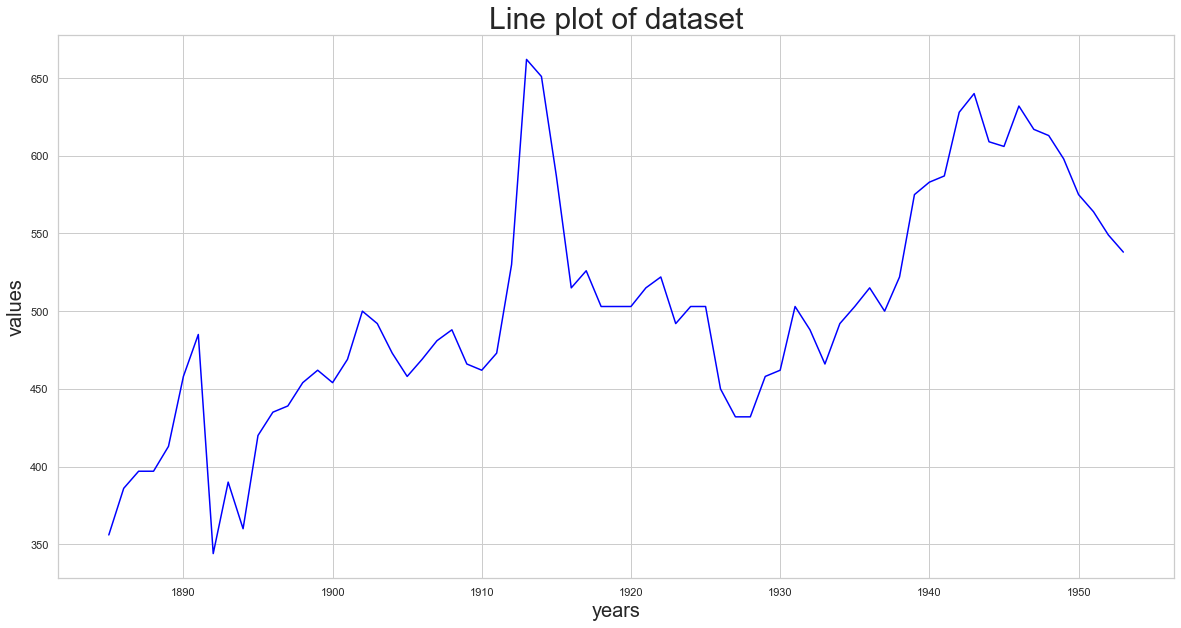

In [24]:
# line plot
fig, ax = plt.subplots(figsize=(20,10))
sns.set_theme(style='whitegrid')
sns.lineplot(data=series,ax=ax,color='blue')
ax.set_title(f"Line plot of dataset", fontdict={'fontsize':30})
ax.set_xlabel('years', fontdict={'fontsize':20})
ax.set_ylabel('values', fontdict={'fontsize':20})

Some observations from the plot include:
- There looks to be an increasing trend in water usage over time.
- There do not appear to be any obvious outliers, although there are some large fluctuations.
- There is a downward trend for the last few years of the series.

There may be some benefit in explicitly modeling the trend component and removing it. You may also explore using differencing with one or two levels in order to make the series stationary.

Text(0.5, 0, '')

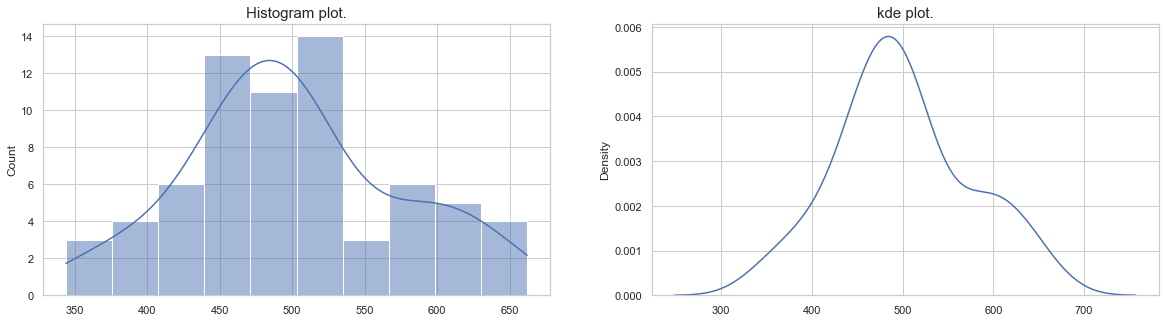

In [25]:
# density plot

fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.set_theme(style='whitegrid')

# histogram density plot
sns.histplot(data=series,bins=10,kde=True, ax=ax[0])
ax[0].set_title("Histogram plot.", fontdict={'fontsize':15})
ax[0].set_xlabel('')

# kde density plot
sns.kdeplot(data=series, ax=ax[1])
ax[1].set_title("kde plot.", fontdict={'fontsize':15})
ax[1].set_xlabel('')

- The distribution is not Gaussian, but is pretty close.
- The distribution has a long right tail and may suggest an exponential distribution or a double Gaussian.

In [26]:
# box plot
# load data
series = pd.read_csv('dataset.csv',header=None,index_col=0,parse_dates=True,squeeze=True)
# decade grouping
groups = series.groupby(pd.Grouper(freq='10YS'))
decades = pd.DataFrame()
for name,group in groups:
    if len(group.values) is 10:
        decades[name.year] = group.values
decades

,1885,1895,1905,1915,1925,1935
0,356,420,458,587,503,503
1,386,435,469,515,450,515
2,397,439,481,526,432,500
3,397,454,488,503,432,522
4,413,462,466,503,458,575
5,458,454,462,503,462,583
6,485,469,473,515,503,587
7,344,500,530,522,488,628
8,390,492,662,492,466,640
9,360,473,651,503,492,609


Text(0.5, 1.0, 'Box plot.')

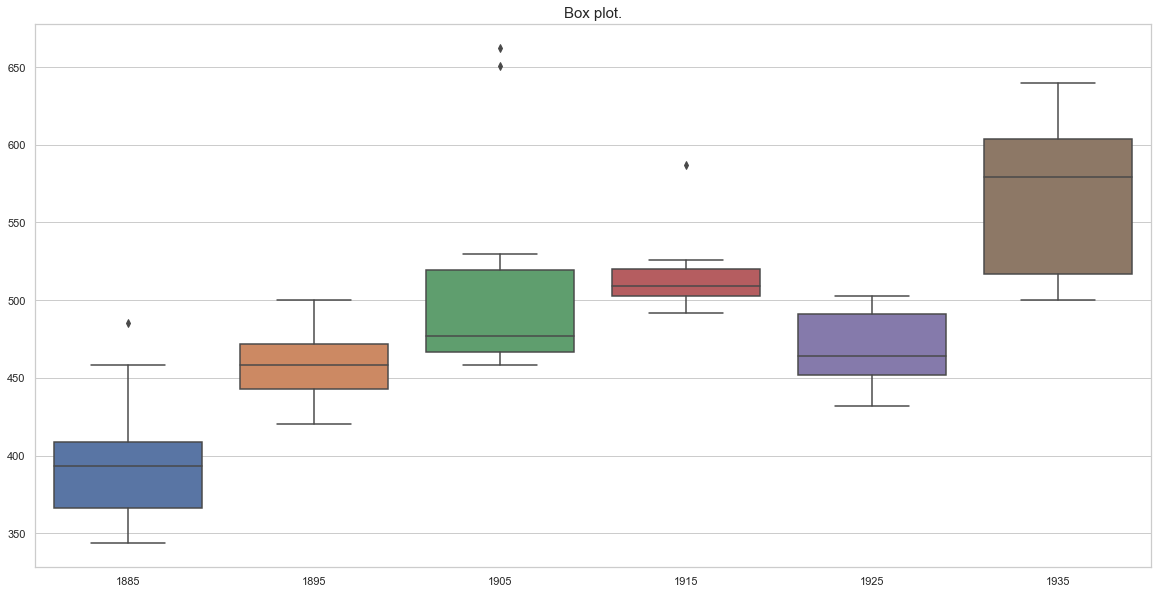

In [27]:
fig, ax = plt.subplots(figsize=(20,10))
sns.set_theme(style='whitegrid')

sns.boxplot(data=decades,ax=ax)
ax.set_title("Box plot.", fontdict={'fontsize':15})

Some observations from reviewing the plot include:
- The median values for each year (red line) may show an increasing trend that may not be linear.
- The spread, or middle 50% of the data (blue boxes), does show some variability.
- There maybe outliers in some decades (crosses outside of the box and whiskers).
- The second to last decade seems to have a lower average consumption, perhaps related to the first world war.

This yearly view of the data is an interesting avenue and could be pursued further by looking at summary statistics from decade-to-decade and changes in summary statistics.

In [28]:
decades.describe()

,1885,1895,1905,1915,1925,1935
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,398.600000,459.800000,514.000000,516.900000,468.600000,566.200000
std,44.377672,24.979102,77.848856,26.714332,26.829503,52.537394
min,344.000000,420.000000,458.000000,492.000000,432.000000,500.000000
25%,366.500000,442.750000,466.750000,503.000000,452.000000,516.750000
50%,393.500000,458.000000,477.000000,509.000000,464.000000,579.000000
75%,409.000000,472.000000,519.500000,520.250000,491.000000,603.500000
max,485.000000,500.000000,662.000000,587.000000,503.000000,640.000000


**ARIMA Models**

As such, this section is broken down into 3 steps:
1. Manually Configure the ARIMA.
2. Automatically Configure the ARIMA.
3. Review Residual Errors.

*Manually Configured ARIMA*

In [32]:
# statistical test for te stationarity of the time series
from statsmodels.tsa.stattools import adfuller

# create a differenced time series 
def difference(dataset):
    diff = []
    for i in range(1,len(dataset)):
        value = dataset[i] - dataset[i-1]
        diff.append(value)
    return pd.Series(diff)


series = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X = series.values
# difference data
stationary = difference(X)
# print(stationary)
stationary.index = series.index[1:]
# print(stationary)

# check if stationary
result = adfuller(stationary)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print(f"Crtitical Values: ")
for key,value in result[4].items():
    print(f"{key}: {np.round(value,4)}")

# save
stationary.to_csv('stationary.csv', header=False)

ADF Statistic: -6.126718808474715
p-value: 8.593851954694127e-08
Crtitical Values: 
1%: -3.5336
5%: -2.9064
10%: -2.5907


Running the example outputs the result of a statistical significance test of whether the differenced series is stationary. Specifically, the augmented Dickey-Fuller test. The results show that the test statistic value -6.126719 is smaller than the critical value at 1% of -3.534. This suggests that we can reject the null hypothesis with a significance level of less than 1% (i.e. a low probability that the result is a statistical fluke). Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.

This suggests that at least one level of differencing is required. The d parameter in our
ARIMA model should at least be a value of 1.

<AxesSubplot:xlabel='0'>

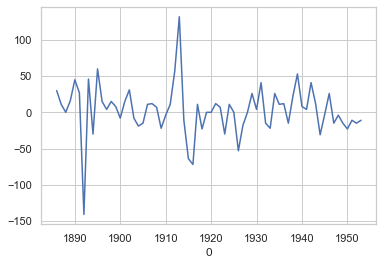

In [33]:
sns.lineplot(data=stationary)

Text(0.5, 1.0, 'Partial Autocorrelation plot')

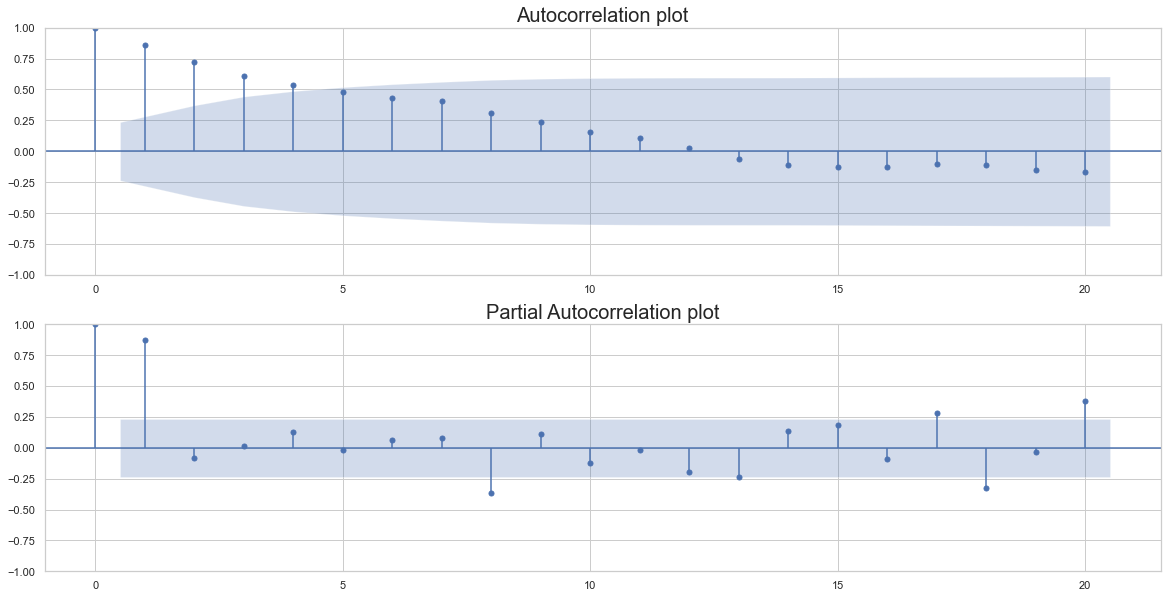

In [35]:
# ACF and PACF plots of time series
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig, ax = plt.subplots(2,1,figsize=(20,10))
sns.set_theme(style="whitegrid")

plot_acf(series,lags=20,ax=ax[0])
ax[0].set_title(f"Autocorrelation plot",fontdict={"fontsize":20})

plot_pacf(series,lags=20,ax=ax[1])
ax[1].set_title(f"Partial Autocorrelation plot", fontdict={"fontsize":20})

p = 1, q = 1 or 2

In [36]:
# Establishing a baseline using ARIMA(4,1,1)
from statsmodels.tsa.arima.model import ARIMA

series = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X = series.values
X = X.astype('float32')
train_size = int(len(X)* 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = []
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=(4,1,1))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print(f"Predicted: {yhat}, Expected: {obs}")
# report performance
rmse = mean_squared_error(test,predictions,squared=False)
print(f"RMSE: {rmse}")

Predicted: 530.1008623471068, Expected: 503.0
Predicted: 511.15440270794926, Expected: 503.0
Predicted: 515.6372971361737, Expected: 515.0
Predicted: 520.9038389105954, Expected: 522.0
Predicted: 525.0086864489429, Expected: 492.0
Predicted: 492.35953497643686, Expected: 503.0
Predicted: 504.6637505420714, Expected: 503.0
Predicted: 512.0823764385325, Expected: 450.0
Predicted: 454.31247712421555, Expected: 432.0
Predicted: 441.3288859068695, Expected: 432.0
Predicted: 452.41835739017887, Expected: 458.0
Predicted: 470.22345289235767, Expected: 462.0
Predicted: 465.85997486115605, Expected: 503.0
Predicted: 498.1116437423537, Expected: 488.0
Predicted: 483.3994593146768, Expected: 466.0
Predicted: 455.12798417154903, Expected: 492.0
Predicted: 492.3199012799766, Expected: 503.0
Predicted: 503.71075635265373, Expected: 515.0
Predicted: 505.81517225760666, Expected: 500.0
Predicted: 493.16503143563443, Expected: 522.0
Predicted: 515.4815683895508, Expected: 575.0
Predicted: 571.332488037

*Grid Search ARIMA Hyperparameters*

In [39]:
# evaluate ARIMA model for given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = []
    for t in range(len(test)):
        model = ARIMA(history, order=(arima_order))
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
        # calculate out of sample error
    rmse = mean_squared_error(test,predictions,squared=False)
    return rmse


# evaluate combinations of p,q,d values for a ARIMA model
def evaluate_models(dataset,p_values,d_values, q_values):
    dataset =dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset,order)
                    if rmse< best_score:
                        best_score, best_cfg = rmse,order
                    print(f"ARIMA: {order}, RMSE: {rmse}")
                except:
                    continue
    print(f"Best ARIMA: {best_cfg}, RMSE: {best_score}")

# load dataset
series = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(0,5)
d_values = range(0,3)
q_values = range(0,5)
warnings.filterwarnings("ignore")

In [40]:
evaluate_models(dataset,p_values,d_values, q_values) # persistance is 21.98

ARIMA: (0, 0, 0), RMSE: 76.75487525230932
ARIMA: (0, 0, 1), RMSE: 47.347468651786514
ARIMA: (0, 0, 2), RMSE: 36.03010513889747
ARIMA: (0, 0, 3), RMSE: 32.53650859739723
ARIMA: (0, 0, 4), RMSE: 29.515833921047236
ARIMA: (0, 1, 0), RMSE: 21.97466073198206
ARIMA: (0, 1, 1), RMSE: 21.906762381543015
ARIMA: (0, 1, 2), RMSE: 22.17765706164766
ARIMA: (0, 1, 3), RMSE: 24.730519424978922
ARIMA: (0, 1, 4), RMSE: 24.843906027411585
ARIMA: (0, 2, 0), RMSE: 28.991624406270848
ARIMA: (0, 2, 1), RMSE: 22.31373285890265
ARIMA: (0, 2, 2), RMSE: 22.19647249556496
ARIMA: (0, 2, 3), RMSE: 22.355959672491156
ARIMA: (0, 2, 4), RMSE: 28.51089606504104
ARIMA: (1, 0, 0), RMSE: 23.95667595729007
ARIMA: (1, 0, 1), RMSE: 23.99131998516259
ARIMA: (1, 0, 2), RMSE: 25.384237852333943
ARIMA: (1, 0, 3), RMSE: 25.058873847851522
ARIMA: (1, 0, 4), RMSE: 25.109491856114733
ARIMA: (1, 1, 0), RMSE: 21.921230161757784
ARIMA: (1, 1, 1), RMSE: 21.8794884994798
ARIMA: (1, 1, 2), RMSE: 23.314190029562468
ARIMA: (1, 1, 3), RMSE:

Best configuration is (2,1,0)

*Review Residual Errors*

In [44]:
series = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X = series.values
X = X.astype('float32')
train_size = int(len(X)* 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = []
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=(2,1,0))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print(f"Predicted: {yhat}, Expected: {obs}")
# report performance
rmse = mean_squared_error(test,predictions,squared=False)
print(f"RMSE: {rmse}")

# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = pd.DataFrame(residuals)
residuals.describe()

Predicted: 501.6271550330287, Expected: 503.0
Predicted: 504.81015567876386, Expected: 503.0
Predicted: 503.0, Expected: 515.0
Predicted: 515.2583879855482, Expected: 522.0
Predicted: 521.2179794109151, Expected: 492.0
Predicted: 490.8218751347634, Expected: 503.0
Predicted: 505.6295198391981, Expected: 503.0
Predicted: 502.10484851318773, Expected: 450.0
Predicted: 449.2664531099519, Expected: 432.0
Predicted: 436.2781517315951, Expected: 432.0
Predicted: 433.5630649006381, Expected: 458.0
Predicted: 458.7351488940571, Expected: 462.0
Predicted: 459.6946801201658, Expected: 503.0
Predicted: 503.9854527016296, Expected: 488.0
Predicted: 484.45393300200436, Expected: 466.0
Predicted: 466.7472448908815, Expected: 492.0
Predicted: 494.55454285460564, Expected: 503.0
Predicted: 500.7366943585933, Expected: 515.0
Predicted: 514.2823267019294, Expected: 500.0
Predicted: 498.55059851215964, Expected: 522.0
Predicted: 523.7188727007882, Expected: 575.0
Predicted: 574.5070029978658, Expected: 5

,0
count,35.000000
mean,1.081458
std,22.022201
min,-52.104849
25%,-16.209637
50%,-0.454858
75%,12.089062
max,51.281127


Text(0.5, 0, '')

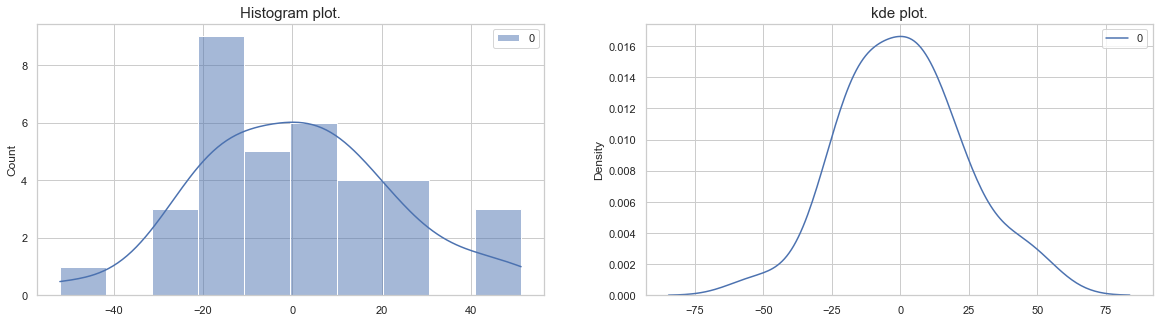

In [45]:
# density plot

fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.set_theme(style='whitegrid')

# histogram density plot
sns.histplot(data=residuals,bins=10,kde=True, ax=ax[0])
ax[0].set_title("Histogram plot.", fontdict={'fontsize':15})
ax[0].set_xlabel('')

# kde density plot
sns.kdeplot(data=residuals, ax=ax[1])
ax[1].set_title("kde plot.", fontdict={'fontsize':15})
ax[1].set_xlabel('')

Text(0.5, 1.0, 'Partial Autocorrelation plot')

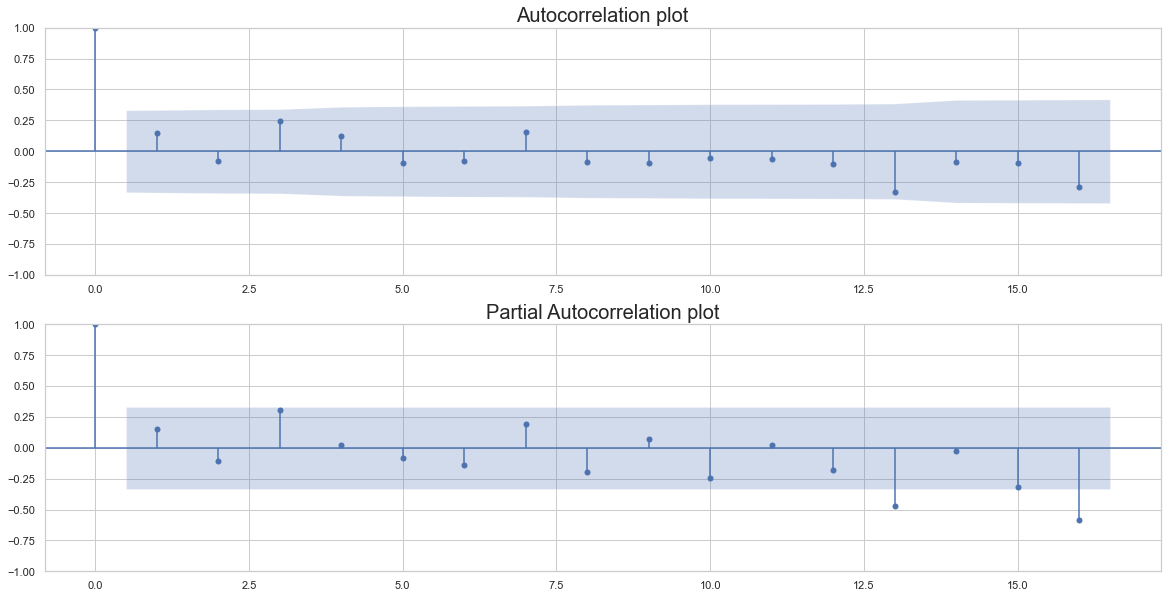

In [50]:
# Checking for correlation in the residuals to see if the model can be further improved

fig, ax = plt.subplots(2,1,figsize=(20,10))
sns.set_theme(style="whitegrid")

plot_acf(residuals,lags=16,ax=ax[0])
ax[0].set_title(f"Autocorrelation plot",fontdict={"fontsize":20})

plot_pacf(residuals,lags=16,ax=ax[1])
ax[1].set_title(f"Partial Autocorrelation plot", fontdict={"fontsize":20})

Running the example first describes the distribution of the residuals. We can see that the distribution has a right shift and that the mean is non-zero at 1.081458. This is perhaps a sign that the predictions are biased.

The distribution of residual errors is also plotted. The graphs suggest a Gaussian-like distribution with a longer right tail, providing further evidence that perhaps a power transform might be worth exploring.

We could use this information to bias-correct predictions by adding the mean residual error of 1.081458 to each forecast made.

In [51]:
series = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X = series.values
X = X.astype('float32')
train_size = int(len(X)* 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = []
bias = 1.081458
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=(2,1,0))
    model_fit = model.fit()
    yhat =  bias + float(model_fit.forecast()[0])
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print(f"Predicted: {yhat}, Expected: {obs}")
# report performance
rmse = mean_squared_error(test,predictions,squared=False)
print(f"RMSE: {rmse}")

# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = pd.DataFrame(residuals)
residuals.describe()

Predicted: 502.7086130330287, Expected: 503.0
Predicted: 505.89161367876386, Expected: 503.0
Predicted: 504.081458, Expected: 515.0
Predicted: 516.3398459855482, Expected: 522.0
Predicted: 522.2994374109151, Expected: 492.0
Predicted: 491.9033331347634, Expected: 503.0
Predicted: 506.7109778391981, Expected: 503.0
Predicted: 503.18630651318773, Expected: 450.0
Predicted: 450.3479111099519, Expected: 432.0
Predicted: 437.35960973159507, Expected: 432.0
Predicted: 434.6445229006381, Expected: 458.0
Predicted: 459.8166068940571, Expected: 462.0
Predicted: 460.7761381201658, Expected: 503.0
Predicted: 505.0669107016296, Expected: 488.0
Predicted: 485.53539100200436, Expected: 466.0
Predicted: 467.8287028908815, Expected: 492.0
Predicted: 495.63600085460564, Expected: 503.0
Predicted: 501.8181523585933, Expected: 515.0
Predicted: 515.3637847019294, Expected: 500.0
Predicted: 499.63205651215964, Expected: 522.0
Predicted: 524.8003307007882, Expected: 575.0
Predicted: 575.5884609978658, Expec

,0
count,3.500000e+01
mean,-2.451300e-07
std,2.202220e+01
min,-5.318631e+01
25%,-1.729110e+01
50%,-1.536316e+00
75%,1.100760e+01
max,5.019967e+01


Text(0.5, 0, '')

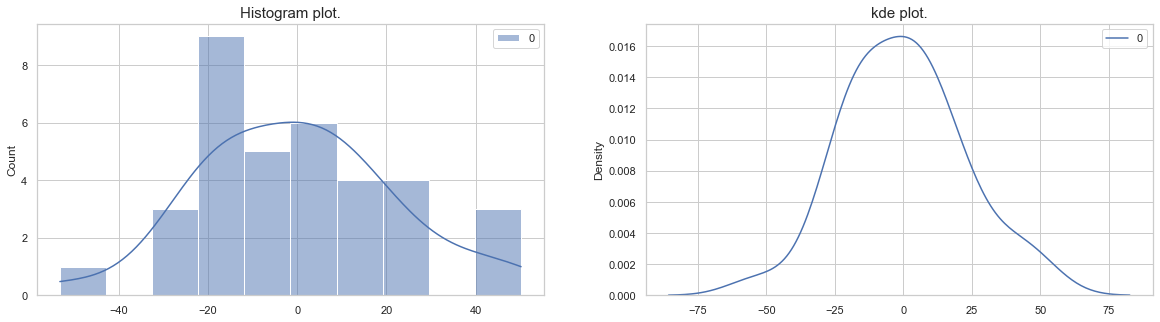

In [52]:
# density plot

fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.set_theme(style='whitegrid')

# histogram density plot
sns.histplot(data=residuals,bins=10,kde=True, ax=ax[0])
ax[0].set_title("Histogram plot.", fontdict={'fontsize':15})
ax[0].set_xlabel('')

# kde density plot
sns.kdeplot(data=residuals, ax=ax[1])
ax[1].set_title("kde plot.", fontdict={'fontsize':15})
ax[1].set_xlabel('')

Text(0.5, 1.0, 'Partial Autocorrelation plot')

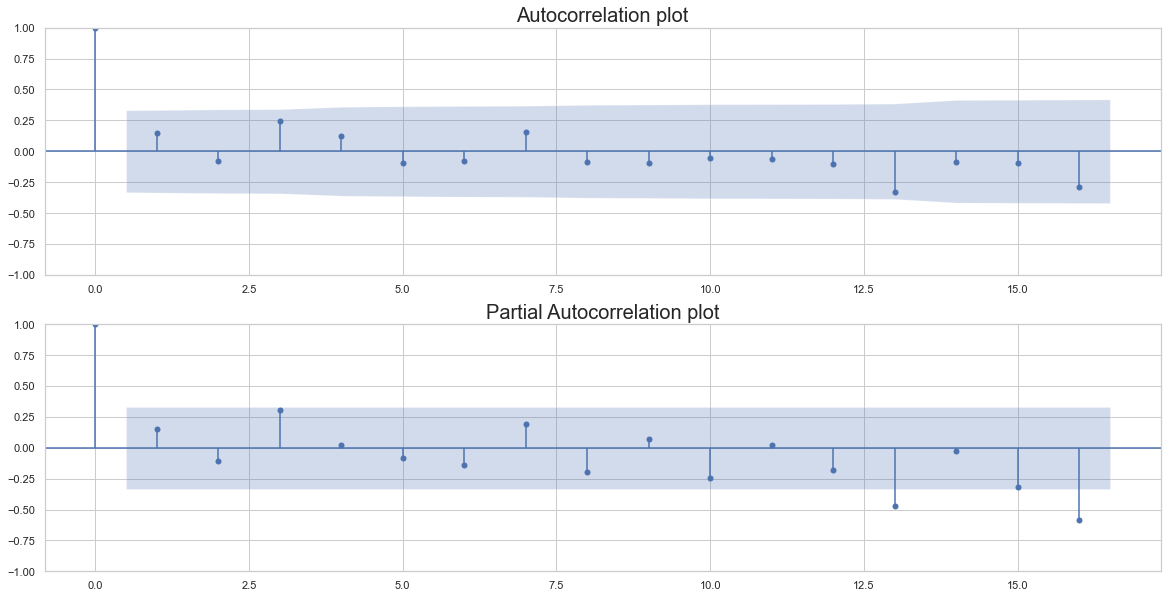

In [53]:
# Checking for correlation in the residuals to see if the model can be further improved

fig, ax = plt.subplots(2,1,figsize=(20,10))
sns.set_theme(style="whitegrid")

plot_acf(residuals,lags=16,ax=ax[0])
ax[0].set_title(f"Autocorrelation plot",fontdict={"fontsize":20})

plot_pacf(residuals,lags=16,ax=ax[1])
ax[1].set_title(f"Partial Autocorrelation plot", fontdict={"fontsize":20})

**Model Validation**

*Finalize Model*

In [55]:
# load data
series = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values.astype('float32')

# fit model
model = ARIMA(X, order=(2,1,0))
model_fit = model.fit()
# save model 
model_fit.save('model.pkl')
np.save('model_bias.npy',[bias])

*Make Prediction*

In [56]:
from statsmodels.tsa.arima.model import ARIMAResults

model_fit = ARIMAResults.load("model.pkl")
bias = np.load("model_bias.npy")
yhat = bias+ float(model_fit.forecast()[0])
print(f"Predicted: {yhat}")

Predicted: [540.01063231]


*Validate Model*

In [85]:
# load and prepare datasets
dataset = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X = dataset.values.astype('float32')
history = [x for x in X]
validation = pd.read_csv('validation.csv', header=None, index_col=0, parse_dates=True,
squeeze=True)
y = validation.values.astype('float32')

# load model 
model_fit = ARIMAResults.load("model.pkl")
bias = np.load("model_bias.npy")
# make first prediction
predictions = list()
yhat = bias + float(model_fit.forecast()[0])
predictions.append(yhat)
history.append(y[0])
print(f"Predicted: {yhat[0]}, Expected: {y[0]}")
# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=(2,1,0))
    model_fit = model.fit()
    yhat = bias + float(model_fit.forecast()[0])
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
    print(f"Predicted: {yhat[0]}, Expected: {obs}")
# report perfomace
rmse = mean_squared_error(y, predictions,squared=False)
print(f"RMSE: {rmse}")

Predicted: 540.0106323073546, Expected: 568.0
Predicted: 571.5927255321781, Expected: 575.0
Predicted: 573.2915559555122, Expected: 579.0
Predicted: 579.5613862029508, Expected: 587.0
Predicted: 588.0640537181208, Expected: 602.0
Predicted: 603.024831131509, Expected: 594.0
Predicted: 593.1772979610205, Expected: 587.0
Predicted: 588.5559699082145, Expected: 587.0
Predicted: 588.7961867501981, Expected: 625.0
Predicted: 627.9466711443913, Expected: 613.0
RMSE: 16.532667153448518


In [86]:
predictions

[array([540.01063231]),
 array([571.59272553]),
 array([573.29155596]),
 array([579.5613862]),
 array([588.06405372]),
 array([603.02483113]),
 array([593.17729796]),
 array([588.55596991]),
 array([588.79618675]),
 array([627.94667114])]

In [87]:
len(predictions)

10

In [88]:
predictions

[array([540.01063231]),
 array([571.59272553]),
 array([573.29155596]),
 array([579.5613862]),
 array([588.06405372]),
 array([603.02483113]),
 array([593.17729796]),
 array([588.55596991]),
 array([588.79618675]),
 array([627.94667114])]

In [92]:
# predictions_2 = predictions.copy()
# pred_pop = predictions_2.pop(0)
# pred_pop[0]

In [94]:
# fixing predictions list problem
predictions_fix = []
for i in range(len(predictions)):
    pred_pop = predictions.pop(0)
    predictions_fix.append(pred_pop[0])

# fixed
print(predictions_fix)

[540.0106323073546, 571.5927255321781, 573.2915559555122, 579.5613862029508, 588.0640537181208, 603.024831131509, 593.1772979610205, 588.5559699082145, 588.7961867501981, 627.9466711443913]


Text(0.5, 1.0, 'Line plot.')

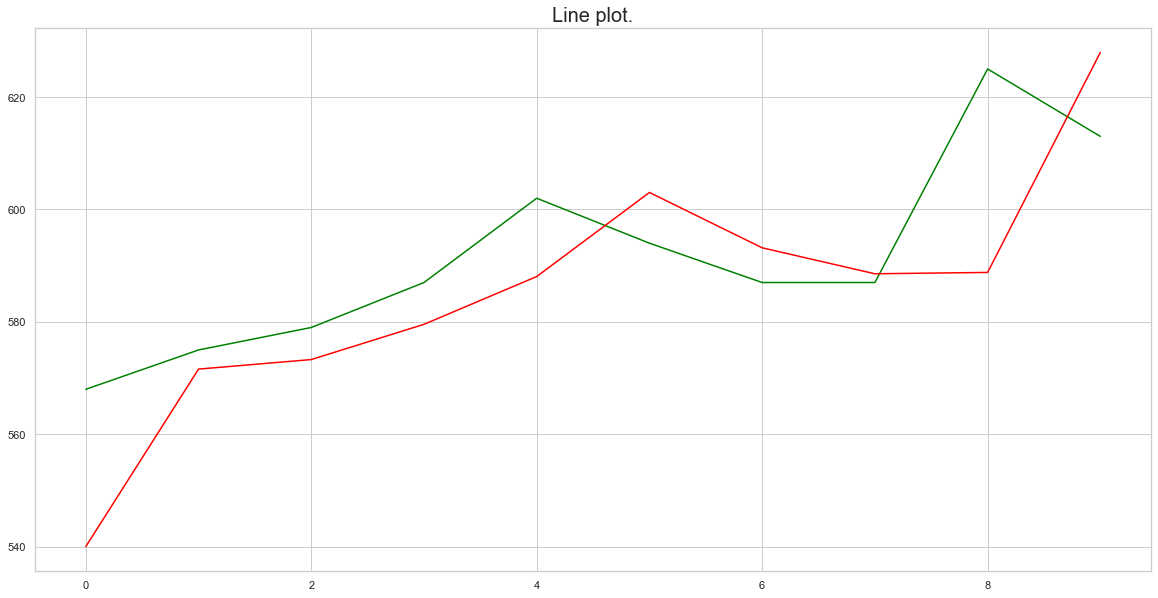

In [97]:
fig, ax = plt.subplots(1,figsize=(20,10))
sns.set_theme(style='whitegrid')

# histogram density plot
sns.lineplot(data=y, ax=ax, color='green')
sns.lineplot(data=predictions_fix,ax=ax, color='red')
ax.set_title("Line plot.", fontdict={'fontsize':20})
